<a href="https://colab.research.google.com/github/asjnhy/SMP-Prediction/blob/master/Time-Series-Practice/Electricity_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Electricity Consumption using Time Series Analysis
## - Forecast using the ARIMA Model 

In [0]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data
from pylab import rcParams
rcParams['figure.figsize'] = 10, 7
df = pd.read_csv('/content/drive/My Drive/dacon_electricity_consumption/Electric_Production.csv')

In [0]:
df

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151
...,...,...
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212


In [0]:
df.columns=['Date', 'Consumption']
df=df.dropna()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True) #set date as index
df.head()


,Consumption
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


## 1. Visualize the time series

### 1.1. ploting

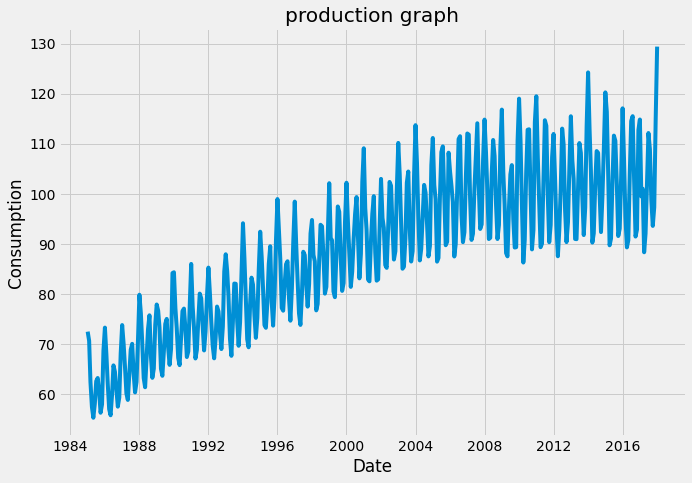

In [0]:
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.title("production graph")
plt.plot(df)


For time series forecast, a series needs to be stationary. The series should have a constant mean, variance, and covariance.

In this case, mean - not constant (upward trend)
--> **Convert into a statonary series**

### 1.2. plotting

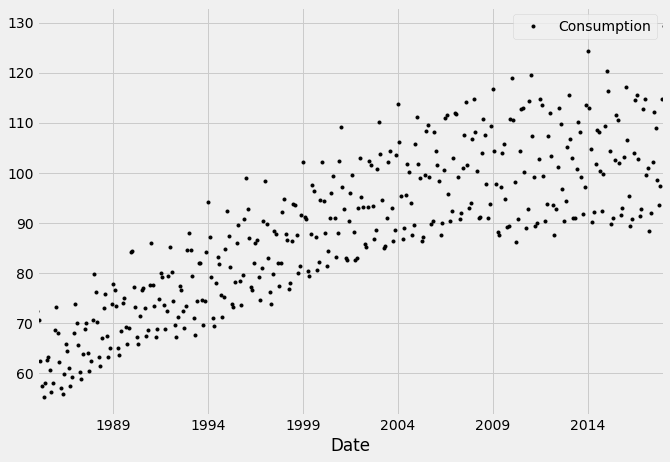

In [0]:
df.plot(style='k.')
plt.show()


## 1.3. Draw Consumption Distribution 
 (near-normal distribution)

 NEED TO BE DONE 

## 1.4. Three Systemic Components 


- Level: The average value in the series.
- Trend: The increasing or decreasing value in the series.
- Seasonality: The repeating short-term cycle in the series.
- Noise: The random variation in the series.


## 1.5. Convert to Stationary 
###  1.5.1. **Seperate seasonality and trend from the series** 

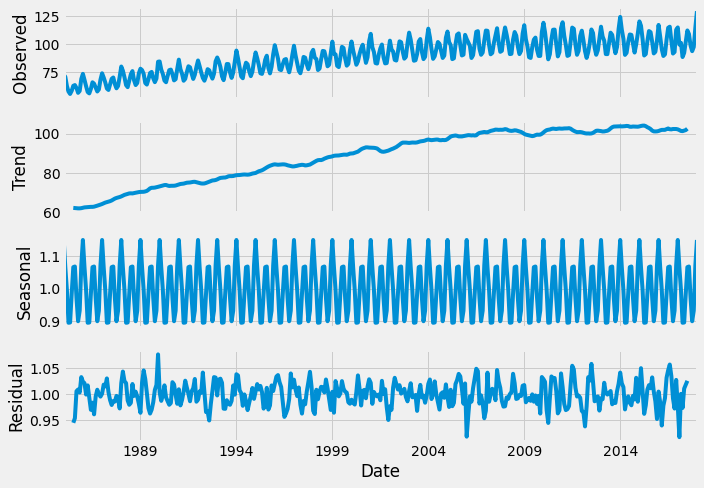

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

1. there is an upward trend
2. recurring event where electricity consumption shoots maximum every year. 

### 1.5.2. **Is the time series Stationary?** 
- Check if a series is stationary or not

1. **ADF TEST** 
\
to determine the presence of unit root in the series


 - Null Hypothesis: The series has a unit root (value of a =1)
 - Alternate Hypothesis: The series has no unit root.

 - If fail to reject Null hypothesis : Series is non-stationary. 

 - Non - Stationary
    - It's linear or difference stationary
 - Stationary 
    - constant mean and constant variance





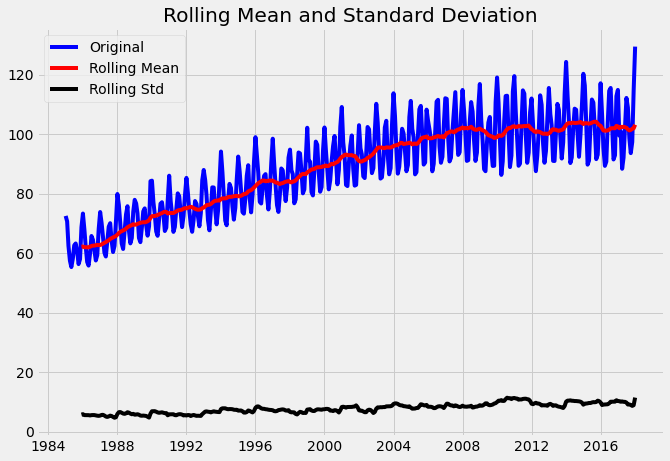

Results of dickey fuller test
Test Statistics                 -2.256990
p-value                          0.186215
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Consumption'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df)

2. **ADF Test Results**
*1) p-value is greater than 0.05 so we cannot reject the Null hypothesis.\
 2) test statistics is greater than the critical values* 


### 1.5.3. **To get Stationary Series - Eliminate the trend** - Using Rolling Average(Moving Average)

 #### 1.5.3.1. reduce the magnitude of the values
  / reduce the rising trend in the series.

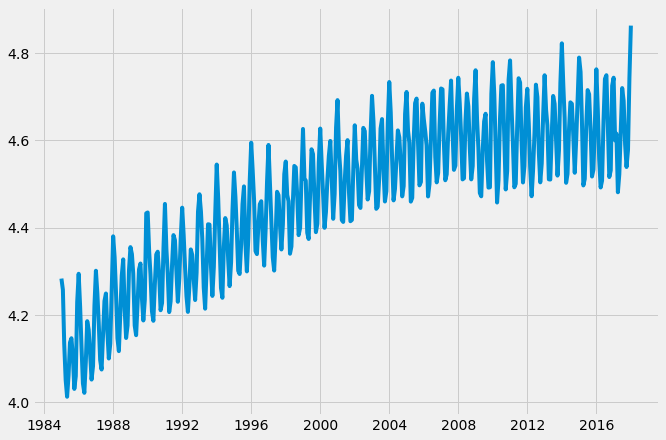

In [0]:
df_log = np.log(df)
plt.plot(df_log)


 #### 1.5.3.2. find the rolling average of the series
  by taking input for the past 12 months and 

1.   List item
2.   List item

giving a mean consumption value at every point further ahead in series.


    Pandas dataframe.rolling(window)

    window : Size of the moving window.

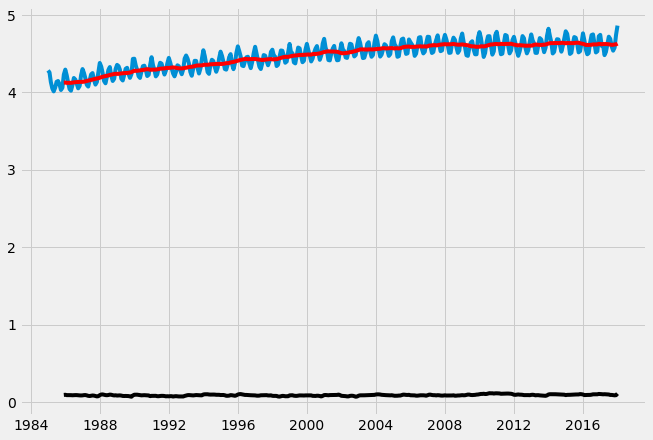

In [0]:
df_log = np.log(df)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.plot(df_log)
plt.plot(moving_avg, color="red")
plt.plot(std_dev, color ="black")
plt.show()

#### 1.5.3.3. eliminate trends out of a series 
 - take the difference of the series and the mean at every point in the series.
 
 (df_log - moving_avg) 

In [0]:
df_log_moving_avg_diff = df_log-moving_avg
df_log_moving_avg_diff.dropna(inplace=True)

In [0]:
df_log_moving_avg_diff

,Consumption
Date,
1985-12-01,0.103961
1986-01-01,0.167724
1986-02-01,0.095629
1986-03-01,0.007329
1986-04-01,-0.079115
...,...
2017-09-01,-0.022477
2017-10-01,-0.076443
2017-11-01,-0.041347


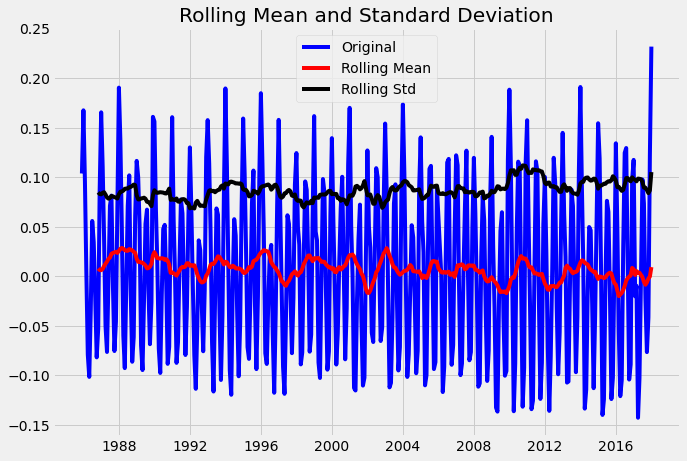

Results of dickey fuller test
Test Statistics                 -5.211586
p-value                          0.000008
No. of lags used                15.000000
Number of observations used    370.000000
critical value (1%)             -3.448148
critical value (5%)             -2.869383
critical value (10%)            -2.570948
dtype: float64


In [0]:
 test_stationarity(df_log_moving_avg_diff)

(Trend 가 잘 사라졌음을 확인함)

### 1.5.4. **To get Stationary Series - Eliminate the trend** - Using Weighted Average

#### 1.5.4.1. Check the weighted average 
  - to understand the trend of the data 

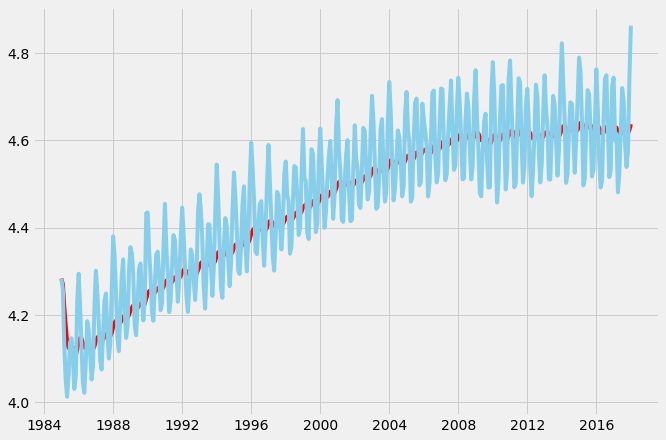

In [0]:
weighted_average = df_log.ewm(halflife=12, min_periods=0,adjust=True).mean()
plt.plot(weighted_average, color = 'red')
plt.plot(df_log, color = 'skyblue')

#### 1.5.4.2. Again test ADF test, but now with subtracting weighted average 
 - df_log - weighted_average

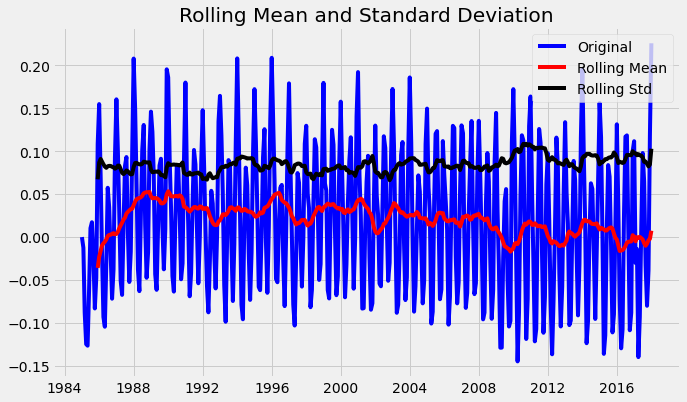

Results of dickey fuller test
Test Statistics                 -3.251531
p-value                          0.017189
No. of lags used                15.000000
Number of observations used    381.000000
critical value (1%)             -3.447631
critical value (5%)             -2.869156
critical value (10%)            -2.570827
dtype: float64


In [0]:
logScale_weightedMean = df_log-weighted_average
from pylab import rcParams
rcParams['figure.figsize'] = 10,6
test_stationarity(logScale_weightedMean)

- Results 
 - Data attained stationarity. 
 - test statistics and critical value is relatively equal.


### 1.5.5. **Eliminate seasonality and trend- Differencing**
 remove the series dependence on time(temporal dependence)  

 stabilize the mean of the time series by removing changes in the level of a time series


 
#### 1.5.5.1.Differencing 
 Differencing : Previous Observation - Current Observation


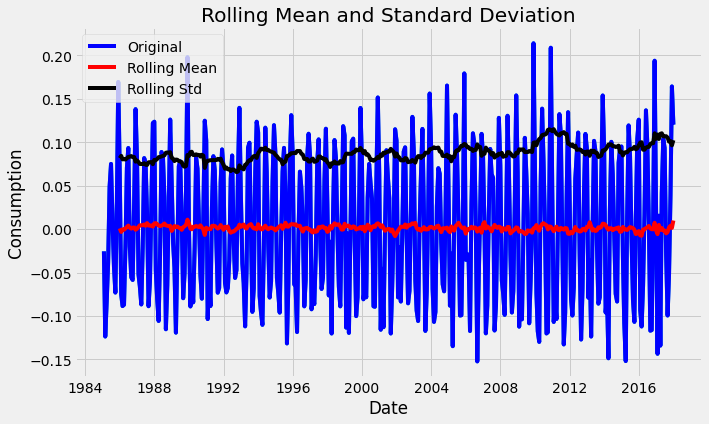

Results of dickey fuller test
Test Statistics               -6.748333e+00
p-value                        2.995161e-09
No. of lags used               1.400000e+01
Number of observations used    3.810000e+02
critical value (1%)           -3.447631e+00
critical value (5%)           -2.869156e+00
critical value (10%)          -2.570827e+00
dtype: float64


In [0]:
df_log_diff = df_log - df_log.shift()
plt.title("Shifted timeseries")
plt.xlabel("Date")
plt.ylabel("Consumption")
plt.plot(df_log_diff)
#Let us test the stationarity of our resultant series
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)


#### 1.5.5.2. Perform Decomposition

In [0]:
!pip install chart_studio

     |████████████████████████████████| 71kB 3.5MB/s 


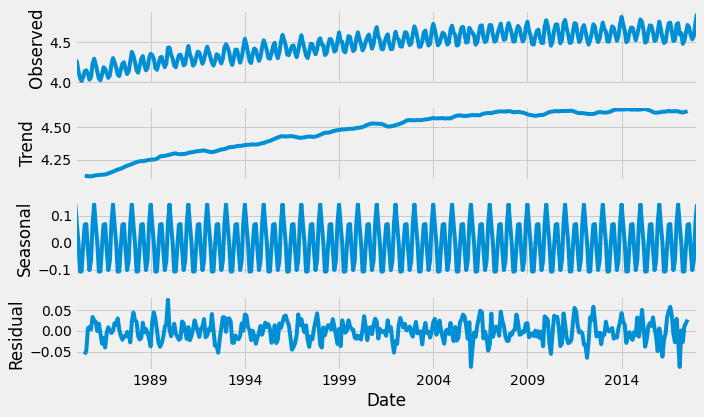

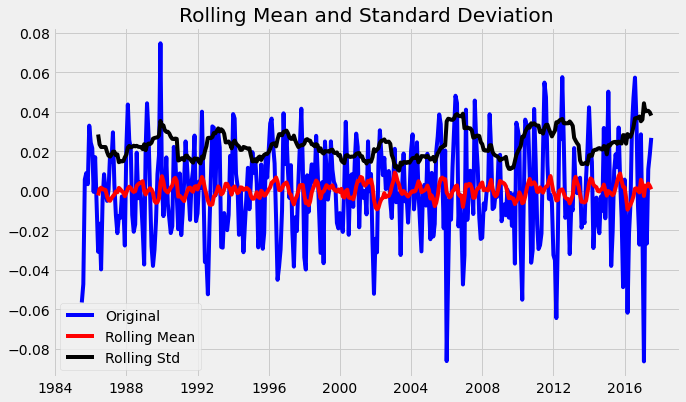

Results of dickey fuller test
Test Statistics               -1.000311e+01
p-value                        1.861632e-17
No. of lags used               1.400000e+01
Number of observations used    3.700000e+02
critical value (1%)           -3.448148e+00
critical value (5%)           -2.869383e+00
critical value (10%)          -2.570948e+00
dtype: float64


In [0]:
from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_log, model='additive', freq = 12)
result.plot()
plt.show()
trend = result.trend
trend.dropna(inplace=True)
seasonality = result.seasonal
seasonality.dropna(inplace=True)
residual = result.resid
residual.dropna(inplace=True)
test_stationarity(residual)


### 1.6.  Finding the best parameters for our model

#### 1.6.1. ACF and PACF plots - To get p and q values

**ACF : Autocorrelation Function**

 - Correlation : strength of the relationship between two variables

-  For Time Series, we can calculate **correlation** for time series observations with previous time steps, called **lags**


**PACF : Partial Autocorrelation Function**

 -   partial autocorrelation at lag k  
 : 







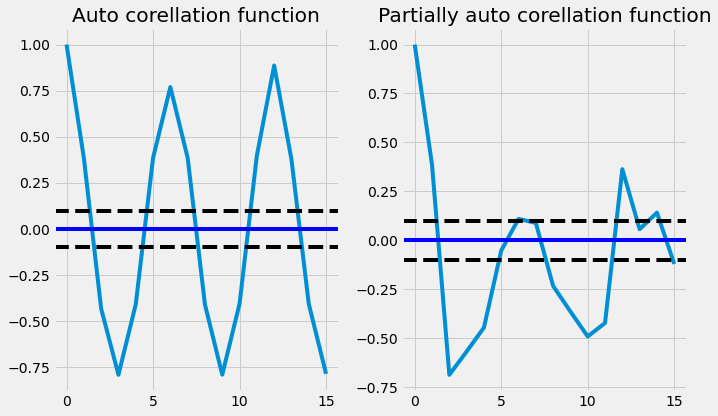

In [0]:
from statsmodels.tsa.stattools import acf,pacf
# we use d value here(data_log_shift)
acf = acf(df_log_diff, nlags=15)
pacf= pacf(df_log_diff, nlags=15,method='ols')
#plot PACF
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()
#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()


#### 1.6.2. ARIMA(p,d,q) Model (Nonseasonal ARIMA Model) 
    p → Number of autoregressive terms,
    d → Number of nonseasonal differences needed for stationarity, and
    q → Number of lagged forecast errors in the prediction equation.


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


RSS : 0.522671


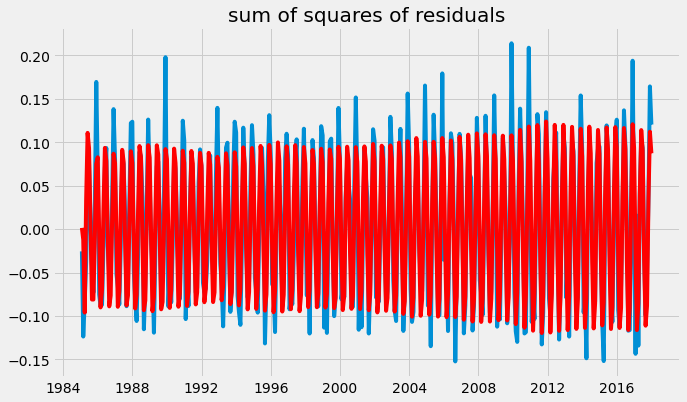

In [0]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_log, order=(3,1,3))
result_AR = model.fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff["Consumption"])**2))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


RSS : 1.273784


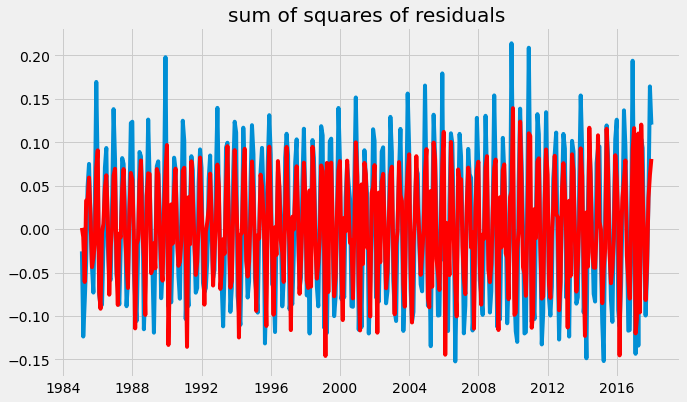

In [0]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(df_log, order=(2,1,0))
result_AR = model.fit(disp = 0)
plt.plot(df_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title("sum of squares of residuals")
print('RSS : %f' %sum((result_AR.fittedvalues-df_log_diff["Consumption"])**2))